##### Regresion Simple No lineal.  
  
Dado el siguiente dataframe de 50 resgistros, con dos variables A y B proponer una funcion de ajuste y obtener mediante la libreria curve_fit de scipy los parámetros por mínimos cuadrados y sus errores. El objtivo es obtener una funcion tal que:
$$B=f(A,a_1,...,a_n)$$  
en donde $a_1,...,a_n$ son los parámetros necesarios para $f(A)$


1) Se carga y analiza el df.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de modulo optimize y método curve_fit
from scipy.optimize import curve_fit


df=pd.read_csv('datos-nolineal.csv')
df.head()

,A,B
0,-27.86,3364.64
1,35.00,5239.98
2,-26.43,2883.34
3,-35.00,4197.32
4,-33.57,4534.79


Se muestra una descripción y si hay NaNs

In [2]:
df.describe()

,A,B
count,50.000000,50.000000
mean,0.000400,1679.995600
std,20.824647,1558.150822
min,-35.000000,-801.710000
25%,-17.502500,374.032500
50%,0.010000,1431.665000
75%,17.502500,2818.385000
max,35.000000,5239.980000


In [21]:
df.isna().sum()

A    0
B    0
dtype: int64

In [4]:
n=df.shape[0]
n

50

Como resultado se tiene:
1) Cantidad de registros $n=50$
2) El dominio de $A$ es $[-35,35]$, el de $B$ $[-802,5240]$ y además 
3) No hay Nulos (NaNs).

Ahora se hace un scatter plot para intuír visualmente como es la relacion entre las variables.

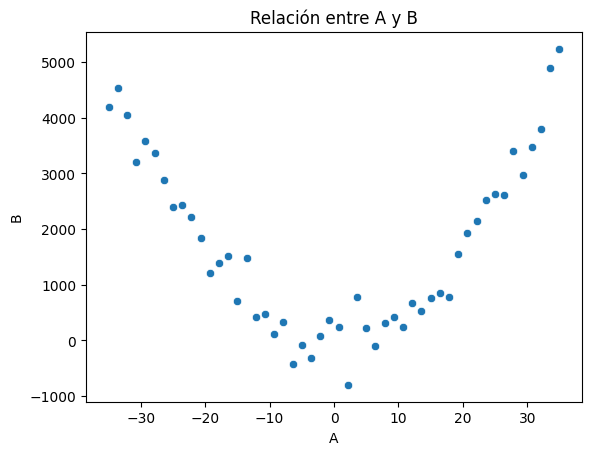

In [5]:
X=df['A']
Y=df['B']

fig,ax=plt.subplots()
sns.scatterplot(x=X,y=Y)
ax.set_title("Relación entre A y B")


plt.show()


Del scatterplot anterior se podrian proponer entre tantas las siguientes opciones:
1) Regresion lineal Simple por tramos:  (utilizando statsmodels)  
     
   Dividir el dominio de A en dos: $[-35,0]$ y $[0,35]$ y en cada uno plantear una regresion lineal.  
   Para el primer intervalo inversamente proporcional $B = a \cdot A+b$ con $a<0$ y  
   para el segundo intervalo directamente proporcional $B = a\cdot A+b$ con $a>0$.  
     
2) Regresion No lineal Simple: (utilizando curve_fit)
     
   Para este caso se propone un polinomio de segundo grado (función cuadrática):
   $$f(A)=a \cdot A^2+b$$
       
Se usará la segunda opción el objetivo será obtener:    
   $$f(A)=(a \pm e_a) \cdot A^2+(b \pm e_b)=(\hat B \pm e_B) $$
  
En donde:  
$e_a$ es el error standard en la determinación de $a$  
$e_b$ es el error standard en la determinación de $b$  
$e_B$ es el error en la estimación de $B$ a través de $\hat B$

1) Se define la función de interpolación o de ajuste que se va a utilizar, para este caso:
   $$y=a \cdot x^2+b$$

In [6]:
def interpol(x,a,b):
    return a*x**2+b

2) Se definien las variables:
   $$Y=df[B]$$
   $$X=df[A]$$

In [7]:
Y=df['B']
X=df['A']

3) Se ajustan los valores muestrales con curve_fit y la funcion interpol definida anteriormente.  
   curve_fit devuelve un array con los valores de los parametros objetivo y la matriz de covarianza.
   $$[a,b]=[3.97 , -6.01]$$
   $$V=v_{ij}=
   \begin{bmatrix}
   0.0155985 & -6.62923892  \\
   -6.62923892 & 5068 
   \end{bmatrix}$$

In [8]:
params, covariance = curve_fit(interpol,X,Y)
a,b=params
print(a,b)
print(covariance)

3.9671312317707423 -6.0057587431021195
[[ 1.55984875e-02 -6.62923892e+00]
 [-6.62923892e+00  5.06846151e+03]]


4) Se calculan los errores standard de los parámetros. Y el error esperado en la estimación de B.
   1) Los errores standard de los parámetros son la raiz cuadrada de los elementos de la diagonal de $V$.
      $$e_a=\sqrt{v_{11}}=0.12 \quad e_b=\sqrt{v_{22}}=71$$
      En general:
      $$e_i=\sqrt{v_{ii}}$$
   2) Para $e_B$ primero se calcula la varianza de los residuos:
    $$v_{\hat{y}} ={\displaystyle\sum_{i=1}^n {(y_i-\hat{y}_i)}^2 \over {n - (k+1)}} =\frac{\hat{e}^T\hat{e}}{n - (k+1)}$$
    En donde:  
    $y_i$ son los valores muestrales de $B$.  
    $\hat{y}_i$ son los valores estimados para $B$ ,$\hat{B}$ .  
    $\hat{e}$ es el array o vector fila o columna en donde $\hat{e}_i=y_i-\hat{y}_i$ .  
    $n$ es el número de registros de la muestra. ( 50 en este caso )  
    $k+1$ son los grados de libertad.  
    $k$ son las variables independientes y 1 por la constante u ordenada al origen. ( $k=1$ , $k+1=2$ )
      
   Y luego se calcula la raiz cuadrada de $v_{\hat{y}}$:
   $$e_B=\sqrt{v_{\hat{y}}}=\sqrt{\frac{\hat{e}^T\hat{e}}{n - (k+1)}}=335$$

In [9]:
# Errores standard de los parámetros
errors = np.sqrt(np.diag(covariance))
errors

array([ 0.1248939 , 71.19312826])

In [10]:
# Error esperado en el estimador de B
er = Y - interpol(X, a, b)
eb=np.sqrt(np.dot(er.T,er)/(n-2))
eb

335.4907438597255

Ahora se grafica para ver visualmente el resultado propuesto.

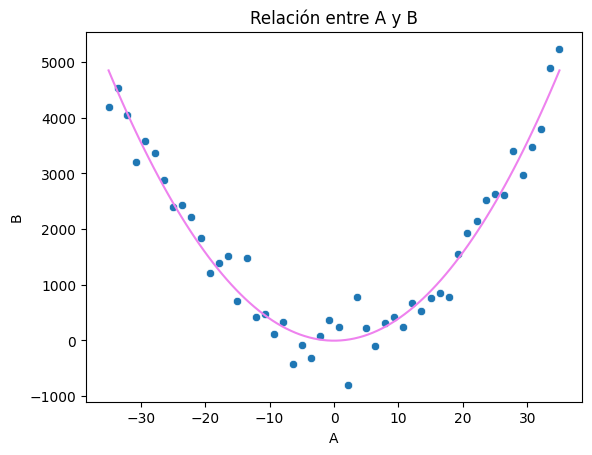

In [11]:
fig,ax=plt.subplots()

sns.scatterplot(x=X,y=Y)
xi=np.linspace(-35,35,100)
ax.plot(xi,interpol(xi,a,b),color='violet',)
ax.set_title("Relación entre A y B")

plt.show()

Finalmente se expone la expresion de la regresion simple no lineal:
$$(\hat B \pm 335) = (3.97 \pm 0.12) \cdot A^2-(6 \pm 71)$$

Se puede calcular el coeficiente de determinación $R^2$:
$$R^2=1-\frac{(y-\hat y)^T(y-\hat y)}{(y-\bar y)^T(y-\bar y)}=1-\frac{\hat{e}^T\hat{e}}{\bar{e}^T\bar{e}}=0.955$$
en donde:

$\bar e_i=y_i-\bar y$   
$\bar y$ es la media de los $B$  
  
y el coeficiente de correlación, $\sqrt{R^2}=R$:  
$$R=0.977$$

In [12]:
# Variabilidad en B
em = Y - Y.mean()
r2=1-(np.dot(er.T,er)/np.dot(em.T,em))
r2

0.9545862613490562

In [13]:
r=np.sqrt(r2)
r

0.9770293042427418

Intervalos de confianza para el 95%:  


In [15]:
# Intervalo de confianza del 95% para los parámetros
inter_Conf = 1.96 * errors  # 1.96 es el valor crítico para un intervalo de confianza del 95%

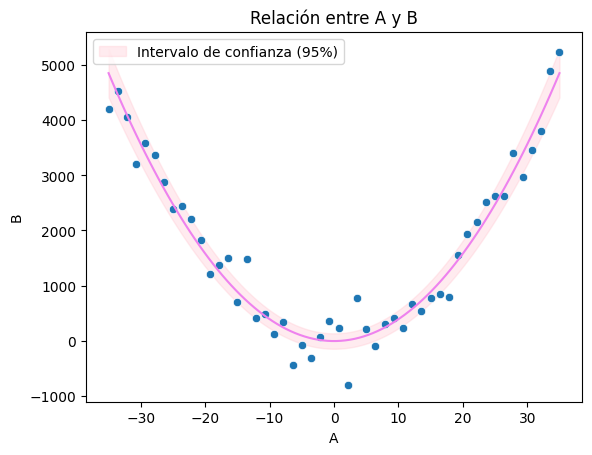

In [18]:
fig,ax=plt.subplots()
xi=np.linspace(-35,35,100)

# Dibujar el intervalo de confianza alrededor del ajuste
lower_bound = interpol(xi, a - inter_Conf[0], b - inter_Conf[1])
upper_bound = interpol(xi, a + inter_Conf[0], b + inter_Conf[1])
plt.fill_between(xi, lower_bound, upper_bound, color='pink', alpha=0.3, label='Intervalo de confianza (95%)')

sns.scatterplot(x=X,y=Y)
ax.plot(xi,interpol(xi,a,b),color='violet',)
ax.set_title("Relación entre A y B")


plt.show()